<a href="https://colab.research.google.com/github/majdzarai/terespo/blob/main/potatoesPFE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf 
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras import models, layers

In [2]:
IMAGE_SIZE = 256
BATCH_SIZE = 32

In [3]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/drive/MyDrive/plants",
    shuffle = True,
    image_size = (IMAGE_SIZE,IMAGE_SIZE),
    batch_size = BATCH_SIZE,
)

Found 2152 files belonging to 3 classes.


In [4]:
for image_batch, label_batch in dataset.take(1):
  print(image_batch.shape)
  print(label_batch.numpy())

(32, 256, 256, 3)
[0 1 1 0 1 0 2 1 0 0 0 1 0 2 0 0 1 1 1 1 0 0 0 0 0 0 0 1 1 0 2 0]


In [5]:
classes = dataset.class_names
classes

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [6]:
for image_batch,label_batch in dataset.take(1):
  print(image_batch[0])

tf.Tensor(
[[[184. 183. 191.]
  [172. 171. 179.]
  [169. 168. 176.]
  ...
  [117. 114. 125.]
  [119. 116. 127.]
  [109. 106. 117.]]

 [[174. 173. 181.]
  [177. 176. 184.]
  [175. 174. 182.]
  ...
  [ 95.  92. 103.]
  [104. 101. 112.]
  [127. 124. 135.]]

 [[165. 164. 172.]
  [184. 183. 191.]
  [147. 146. 154.]
  ...
  [143. 140. 151.]
  [113. 110. 121.]
  [125. 122. 133.]]

 ...

 [[159. 156. 167.]
  [155. 152. 163.]
  [150. 147. 158.]
  ...
  [117. 114. 123.]
  [111. 108. 117.]
  [ 95.  92. 101.]]

 [[149. 146. 157.]
  [145. 142. 153.]
  [140. 137. 148.]
  ...
  [ 76.  73.  82.]
  [122. 119. 128.]
  [161. 158. 167.]]

 [[150. 147. 158.]
  [149. 146. 157.]
  [147. 144. 155.]
  ...
  [106. 103. 112.]
  [ 92.  89.  98.]
  [115. 112. 121.]]], shape=(256, 256, 3), dtype=float32)


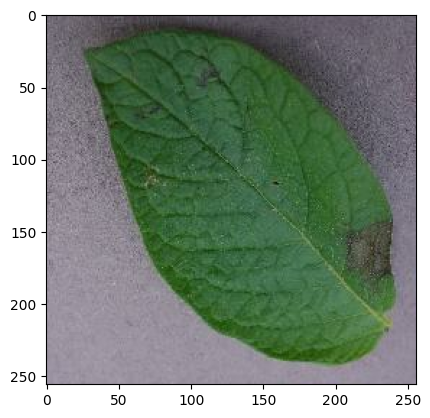

In [7]:
for image_batch,label_batch in dataset.take(1):
  plt.imshow(image_batch[0].numpy().astype("uint8"))

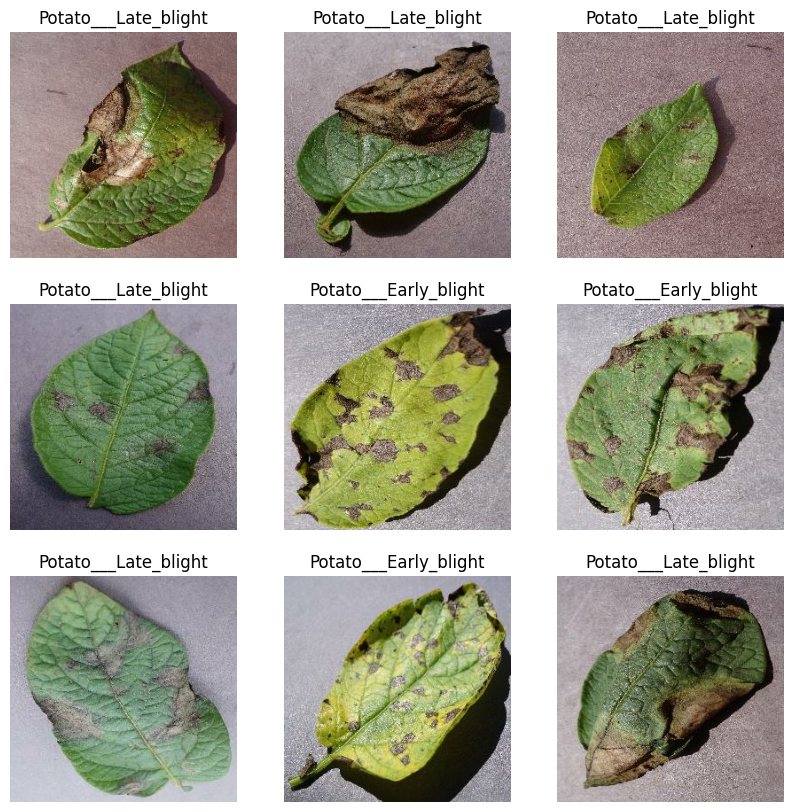

In [8]:
plt.figure(figsize=(10,10))
for image_batch,label_batch in dataset.take(1):
  for i in range (9):
    x = plt.subplot(3, 3, i+1)
    plt.imshow(image_batch[i].numpy().astype("uint8"))
    plt.title(classes[label_batch[i]])
    plt.axis("off")


In [9]:
len(dataset)

68

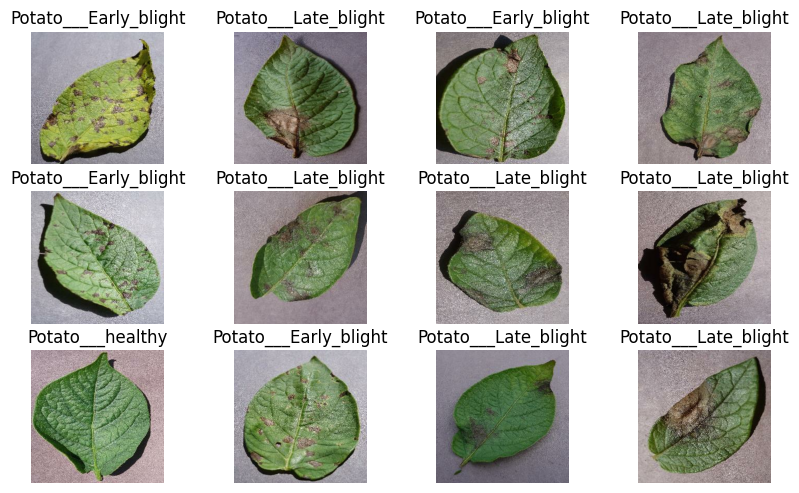

In [10]:
plt.figure(figsize=(10,10))
for image_batch,label_batch in dataset.take(2):
  for i in range (12):
    x = plt.subplot(5, 4, i+1)
    plt.imshow(image_batch[i].numpy().astype("uint8"))
    plt.title(classes[label_batch[i]])
    plt.axis("off")

In [12]:
def splitting (ds, train_split = 0.8, validation_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    if shuffle:
     ds=ds.shuffle(shuffle_size, seed=5)
    ds_size = len(dataset)
    train_size = int(train_split * ds_size)
    val_size = int(validation_split * ds_size)
    train_ds = dataset.take(train_size)
    val_ds= dataset.skip(train_size).take(val_size)
    test_ds = dataset.skip(train_size).skip(val_size)
    return train_ds, val_ds, test_ds 


In [13]:
train_ds, val_ds, test_ds = splitting(dataset)

In [14]:
len(train_ds)

54

In [15]:
len(val_ds)

6

In [16]:
len(test_ds)

8

In [18]:
scale_size = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE,IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
    
])

In [21]:
augmentation=tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.5),
])

In [22]:
numberclass = 3 

In [25]:
channels = 3 
SHAPE = (IMAGE_SIZE,IMAGE_SIZE, channels, BATCH_SIZE)


In [41]:
model = models.Sequential([
    scale_size,
    augmentation,
    layers.Conv2D(32, (3,3), activation = "relu", input_shape = (SHAPE)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size=(3,3), activation = "relu"),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size=(3,3), activation = "relu"),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation = "relu"),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation = "relu"),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation = "relu"),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation = "relu"),
    layers.Dense(numberclass, activation="softmax")

])
model.build(input_shape=SHAPE)

In [42]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   multiple                  0         
                                                                 
 sequential_2 (Sequential)   (None, 256, 256, None)    0         
                                                                 
 conv2d_6 (Conv2D)           (256, 254, 254, 32)       9248      
                                                                 
 max_pooling2d_6 (MaxPooling  (256, 127, 127, 32)      0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (256, 125, 125, 64)       18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (256, 62, 62, 64)        0         
 2D)                                                  

In [43]:
model.compile (
    optimizer = "adam", 
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=["accuracy"]
)

In [44]:
epoches = 50

In [48]:
model.fit(train_ds)

ValueError: ignored